In [217]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import geopandas as gpd

In [218]:
# Dataset
data = pd.read_csv('Inequality in Income.csv')

In [219]:
# Columns
data.columns

Index(['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'Inequality in income (2010)',
       'Inequality in income (2011)', 'Inequality in income (2012)',
       'Inequality in income (2013)', 'Inequality in income (2014)',
       'Inequality in income (2015)', 'Inequality in income (2016)',
       'Inequality in income (2017)', 'Inequality in income (2018)',
       'Inequality in income (2019)', 'Inequality in income (2020)',
       'Inequality in income (2021)'],
      dtype='object')

In [220]:
# First 5 Rows
data.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,10.76700,10.76700,10.767000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,24.45400,28.94534,28.945340,28.945340,28.945340,28.945340,28.877330,28.877330,28.87733,28.87733,28.87733,28.87733
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,18.33096,18.33096,12.237393,12.237393,12.237393,12.237393,12.237393,12.237393,13.17898,13.17898,13.17898,13.17898
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
# Non - Graphical Analysis

In [222]:
# 1. Descriptive Statistics (2021)

print("Descriptive Statistics (2021):")
print(data['Inequality in income (2021)'].describe())

Descriptive Statistics (2021):
count    160.000000
mean      22.808170
std        9.664903
min        8.305240
25%       16.529762
50%       20.913235
75%       28.062632
max       56.996000
Name: Inequality in income (2021), dtype: float64


In [223]:
# 2. Average Inequality by Continent (2021)

print("\nAverage Inequality by Continent:")
print(data.groupby('Continent')['Inequality in income (2021)'].mean())


Average Inequality by Continent:
Continent
Africa     28.069222
America    30.779812
Asia       19.291208
Europe     14.292916
Oceania    21.217032
Name: Inequality in income (2021), dtype: float64


In [224]:
# 3. Trend Analysis (2010-2021)

years = [f'Inequality in income ({year})' for year in range(2010, 2022)]
print("\nTrend Analysis (2010-2021):")
average_inequality = data[years].mean()
trend_analysis = pd.DataFrame(average_inequality).reset_index()
trend_analysis.columns = ['Year', 'Average Inequality']
trend_analysis['Change'] = trend_analysis['Average Inequality'].diff()
trend_analysis['Percentage Change'] = (trend_analysis['Change'] / trend_analysis['Average Inequality'].shift(1)) * 100
print(trend_analysis)


Trend Analysis (2010-2021):
                           Year  Average Inequality    Change  \
0   Inequality in income (2010)           24.315915       NaN   
1   Inequality in income (2011)           23.998923 -0.316992   
2   Inequality in income (2012)           24.059115  0.060192   
3   Inequality in income (2013)           23.756587 -0.302528   
4   Inequality in income (2014)           23.631926 -0.124661   
5   Inequality in income (2015)           23.276751 -0.355175   
6   Inequality in income (2016)           23.437117  0.160367   
7   Inequality in income (2017)           23.356497 -0.080620   
8   Inequality in income (2018)           23.156230 -0.200268   
9   Inequality in income (2019)           23.118396 -0.037834   
10  Inequality in income (2020)           22.808170 -0.310225   
11  Inequality in income (2021)           22.808170  0.000000   

    Percentage Change  
0                 NaN  
1           -1.303639  
2            0.250812  
3           -1.257435  
4    

In [225]:
# 4. Correlation: HDI Rank vs. Inequality (2021)

print("\nCorrelation (HDI Rank vs. Inequality 2021):")
print(data[['HDI Rank (2021)', 'Inequality in income (2021)']].corr())


Correlation (HDI Rank vs. Inequality 2021):
                             HDI Rank (2021)  Inequality in income (2021)
HDI Rank (2021)                     1.000000                     0.435066
Inequality in income (2021)         0.435066                     1.000000


In [226]:
# 5. Countries with Extreme Inequality (Top 10%) (2021)

threshold = data['Inequality in income (2021)'].quantile(0.90)
high_ineq = data[data['Inequality in income (2021)'] >= threshold]
print("\nCountries with Extreme Inequality (Top 10%):")
print(high_ineq[['Country', 'ISO3', 'Inequality in income (2021)']])


Countries with Extreme Inequality (Top 10%):
                      Country ISO3  Inequality in income (2021)
21                     Belize  BLZ                    37.926330
23                     Brazil  BRA                    41.306376
28   Central African Republic  CAF                    49.194590
34                   Cameroon  CMR                    34.989110
37                   Colombia  COL                    37.712196
38                    Comoros  COM                    56.013380
51                      Egypt  EGY                    36.503000
66              Guinea-Bissau  GNB                    37.900000
73                   Honduras  HND                    34.911526
75                      Haiti  HTI                    50.438670
125                   Namibia  NAM                    53.585580
136                    Panama  PAN                    36.569706
162                  Suriname  SUR                    46.696310
166                  Eswatini  SWZ                    37.9

In [227]:
# 6. Missing Data Analysis

print("\nMissing Data:")
print(data.isnull().sum()[data.isnull().sum() > 0])


Missing Data:
Human Development Groups        4
UNDP Developing Regions        44
HDI Rank (2021)                 4
Inequality in income (2010)    62
Inequality in income (2011)    53
Inequality in income (2012)    48
Inequality in income (2013)    42
Inequality in income (2014)    41
Inequality in income (2015)    42
Inequality in income (2016)    41
Inequality in income (2017)    42
Inequality in income (2018)    39
Inequality in income (2019)    38
Inequality in income (2020)    35
Inequality in income (2021)    35
dtype: int64


In [228]:
# 7. Categorize Countries by Inequality Level (2021)

def categorize_inequality(value):
    if value < 30: return 'Low'
    elif 30 <= value < 50: return 'Medium'
    else: return 'High'

data['Inequality Category'] = data['Inequality in income (2021)'].apply(categorize_inequality)
print("\nInequality Categories:")
print(data['Inequality Category'].value_counts())


Inequality Categories:
Inequality Category
Low       131
High       39
Medium     25
Name: count, dtype: int64


In [229]:
# 8. Inequality by Human Development Groups (2021)

print("\nInequality by Human Development Groups:")
print(data.groupby('Human Development Groups')['Inequality in income (2021)'].mean())


Inequality by Human Development Groups:
Human Development Groups
High         24.816858
Low          26.117518
Medium       26.401183
Very High    17.065692
Name: Inequality in income (2021), dtype: float64


In [230]:
# 9. Regional Analysis (UNDP Developing Regions 2021)

print("\nInequality in UNDP Developing Regions:")
print(data.groupby('UNDP Developing Regions')['Inequality in income (2021)'].mean())


Inequality in UNDP Developing Regions:
UNDP Developing Regions
AS     23.051592
EAP    20.987767
ECA    15.974590
LAC    31.630237
SA     19.669358
SSA    28.640373
Name: Inequality in income (2021), dtype: float64


In [231]:
# 10. Temporal Changes (2010 - 2021)

data['Change (2010-2021)'] = data['Inequality in income (2021)'] - data['Inequality in income (2010)']
print("\nTop 5 Countries with Largest Increase in Inequality:")
print(data[['Country', 'Change (2010-2021)']].nlargest(5, 'Change (2010-2021)'))


Top 5 Countries with Largest Increase in Inequality:
      Country  Change (2010-2021)
151     Sudan            11.78853
162  Suriname             9.37616
13      Benin             8.35998
123    Malawi             8.16360
11    Burundi             7.68538


In [232]:
# Graphical Analysis

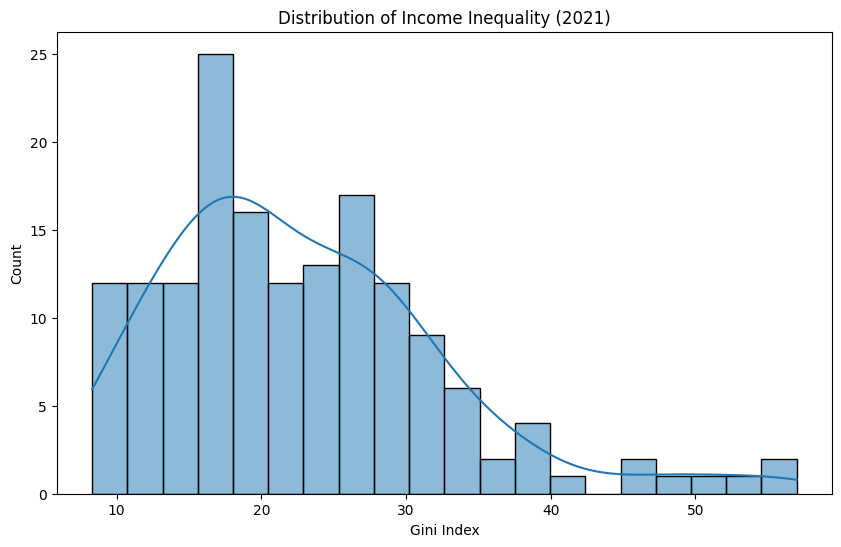

In [233]:
# 1. Histogram

# Histogram of Inequality in Income (2021)
plt.figure(figsize=(10, 6))
sns.histplot(data['Inequality in income (2021)'], bins=20, kde=True)
plt.title('Distribution of Income Inequality (2021)')
plt.xlabel('Gini Index')
plt.show()



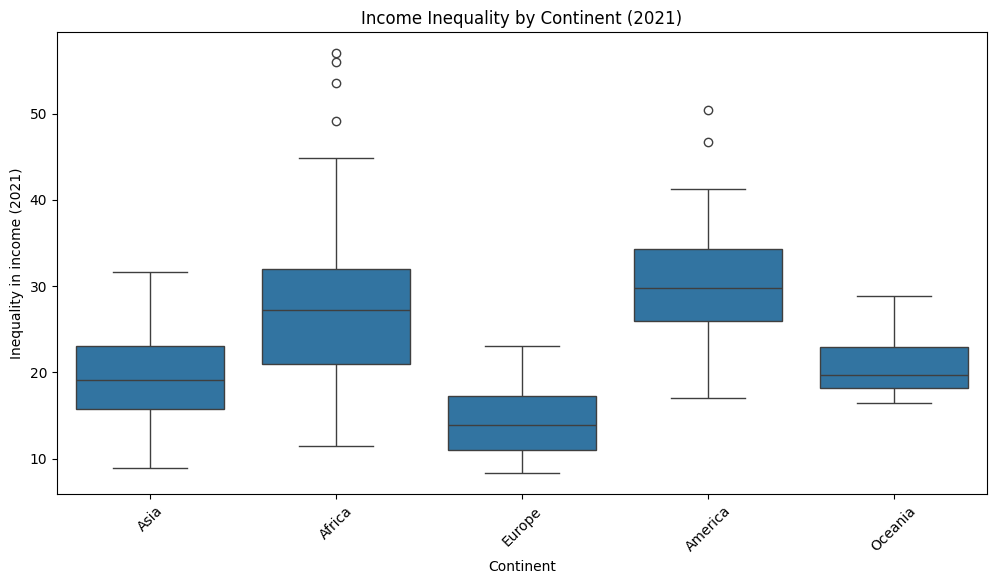

In [234]:
# 2. Box Plot

# Box Plot of Inequality in Income by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Inequality in income (2021)', data=data)
plt.title('Income Inequality by Continent (2021)')
plt.xticks(rotation=45)
plt.show()

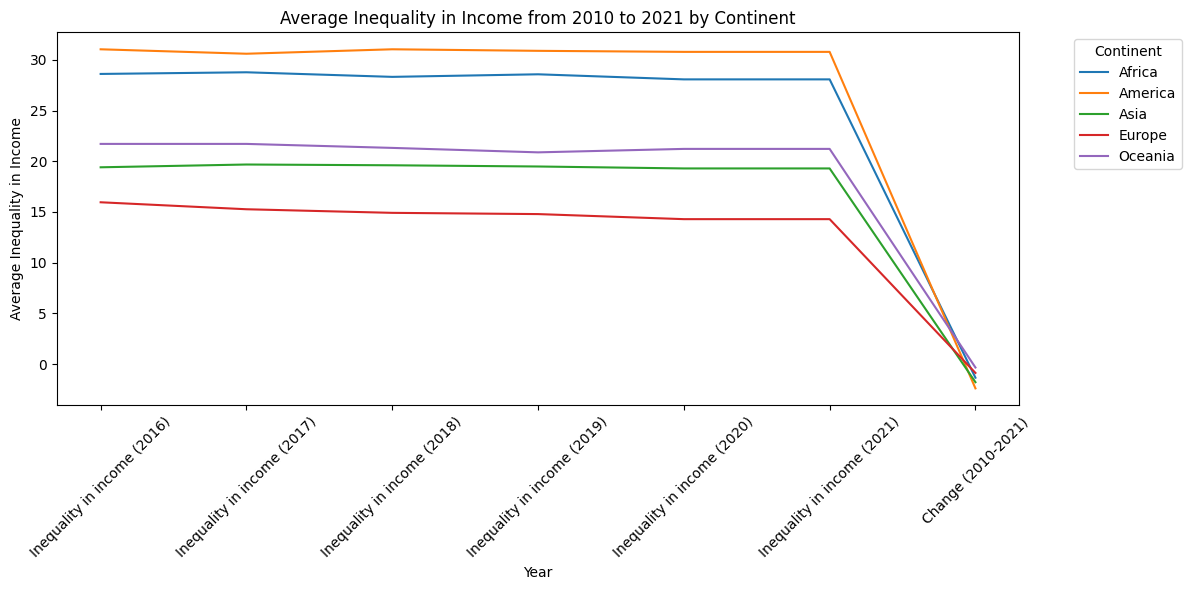

In [235]:
# 3. Line Chart

# Line Graph of  Average Inequality in Income Over Time (2010-2021)

# Select only numeric columns before computing mean
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Continent' and compute the mean only for numeric columns
income_inequality = data.groupby('Continent')[numeric_cols].mean().iloc[:, 7:].T  

# Plot
plt.figure(figsize=(12, 6))
for continent in income_inequality.columns:
    sns.lineplot(x=income_inequality.index, y=income_inequality[continent], label=continent)

plt.title('Average Inequality in Income from 2010 to 2021 by Continent')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Income')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

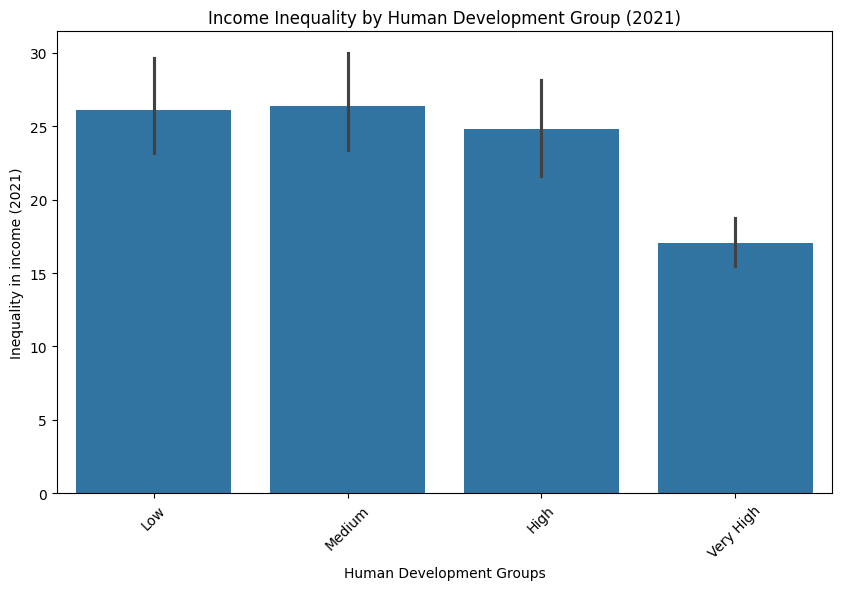

In [236]:
# 4. Bar Graph

# Bar Chart of Average Inequality in Income by Human Development Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Human Development Groups', y='Inequality in income (2021)', data=data)
plt.title('Income Inequality by Human Development Group (2021)')
plt.xticks(rotation=45)
plt.show()

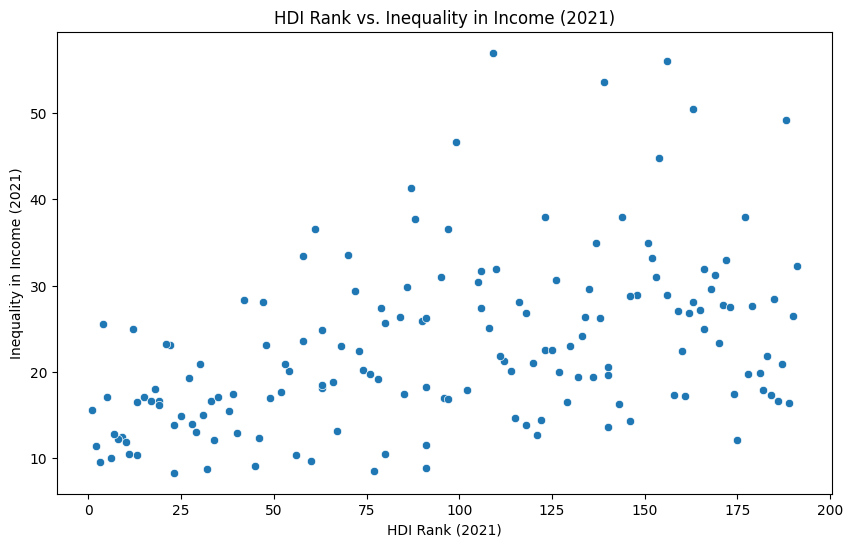

In [237]:
# 5. Scatter Plot

# Scatter Plot of HDI Rank vs Inequality in Income (2021)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDI Rank (2021)', y='Inequality in income (2021)', data=data)
plt.title('HDI Rank vs. Inequality in Income (2021)')
plt.xlabel('HDI Rank (2021)')
plt.ylabel('Inequality in Income (2021)')
plt.show()

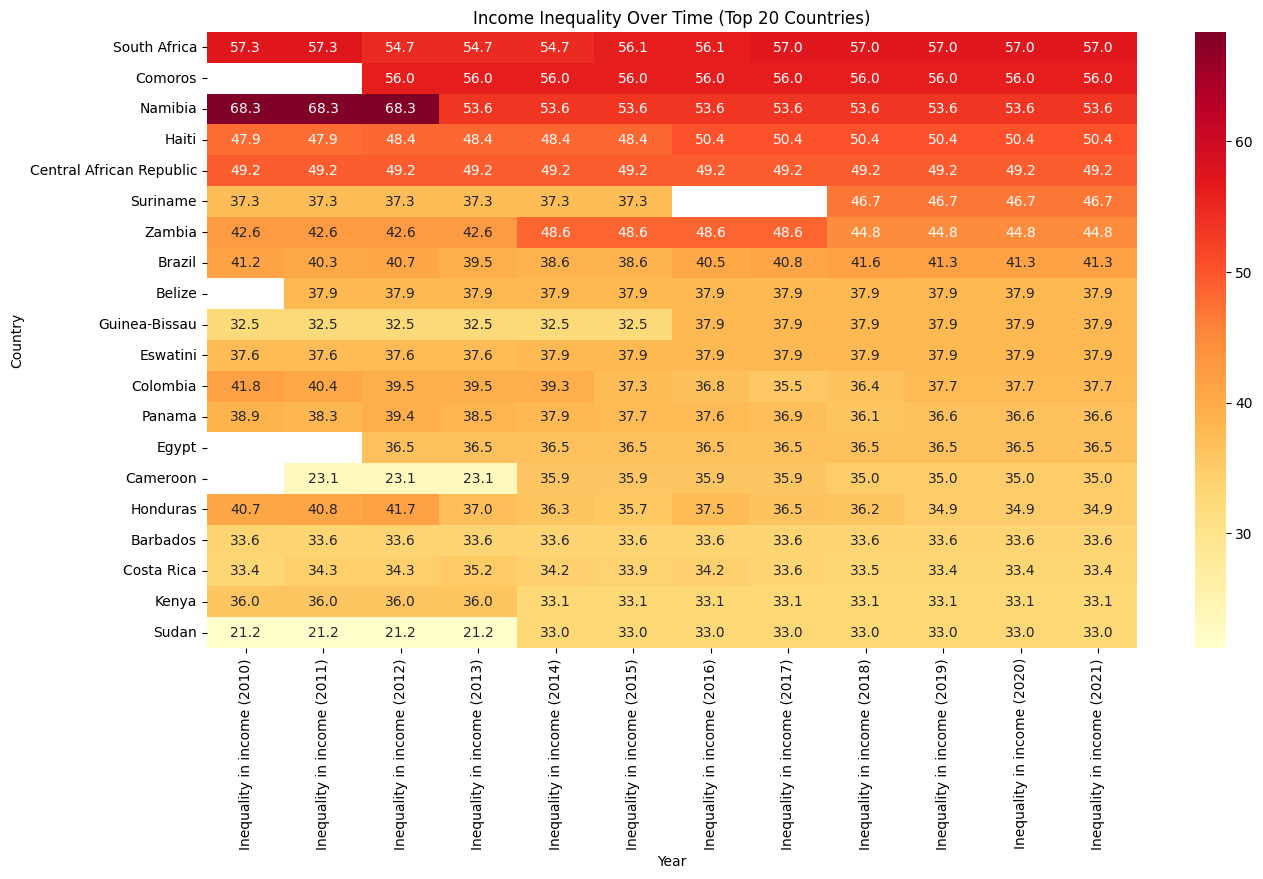

In [238]:
# 6. Heatmap

# Heatmap of Inequality in Income by Country (20) and Year (2010 - 2021)
years = [f'Inequality in income ({year})' for year in range(2010, 2022)]

plt.figure(figsize=(15, 8))
top_countries = data.nlargest(20, 'Inequality in income (2021)').set_index('Country')[years]
sns.heatmap(top_countries, annot=True, cmap='YlOrRd', fmt=".1f")
plt.title('Income Inequality Over Time (Top 20 Countries)')
plt.xlabel('Year')
plt.show()

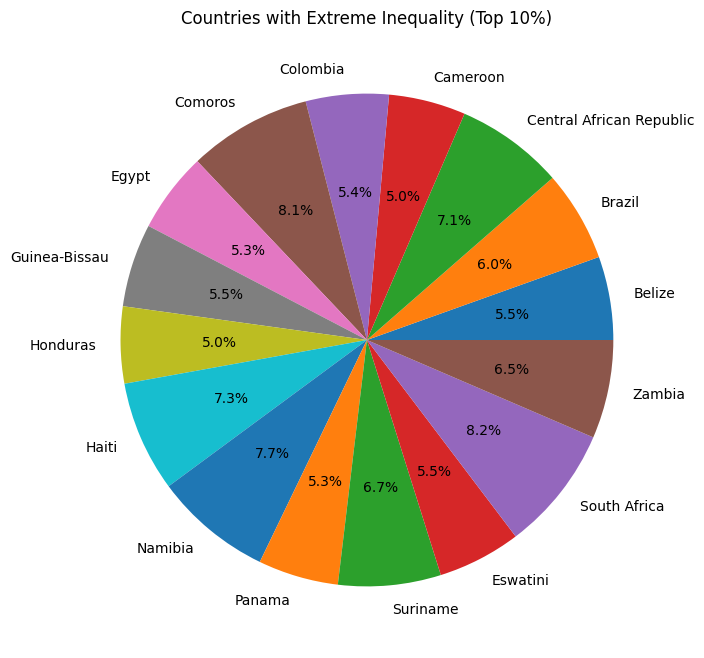

In [239]:
# 7. Pie Chart

# Pie Chart of Countries with Extreme Inequality (Top 10%)
threshold = data['Inequality in income (2021)'].quantile(0.90)  # Top 10% threshold
extreme_inequality = data[data['Inequality in income (2021)'] >= threshold]
plt.figure(figsize=(8, 8))
plt.pie(extreme_inequality['Inequality in income (2021)'], labels=extreme_inequality['Country'], autopct='%1.1f%%')
plt.title('Countries with Extreme Inequality (Top 10%)')
plt.show()

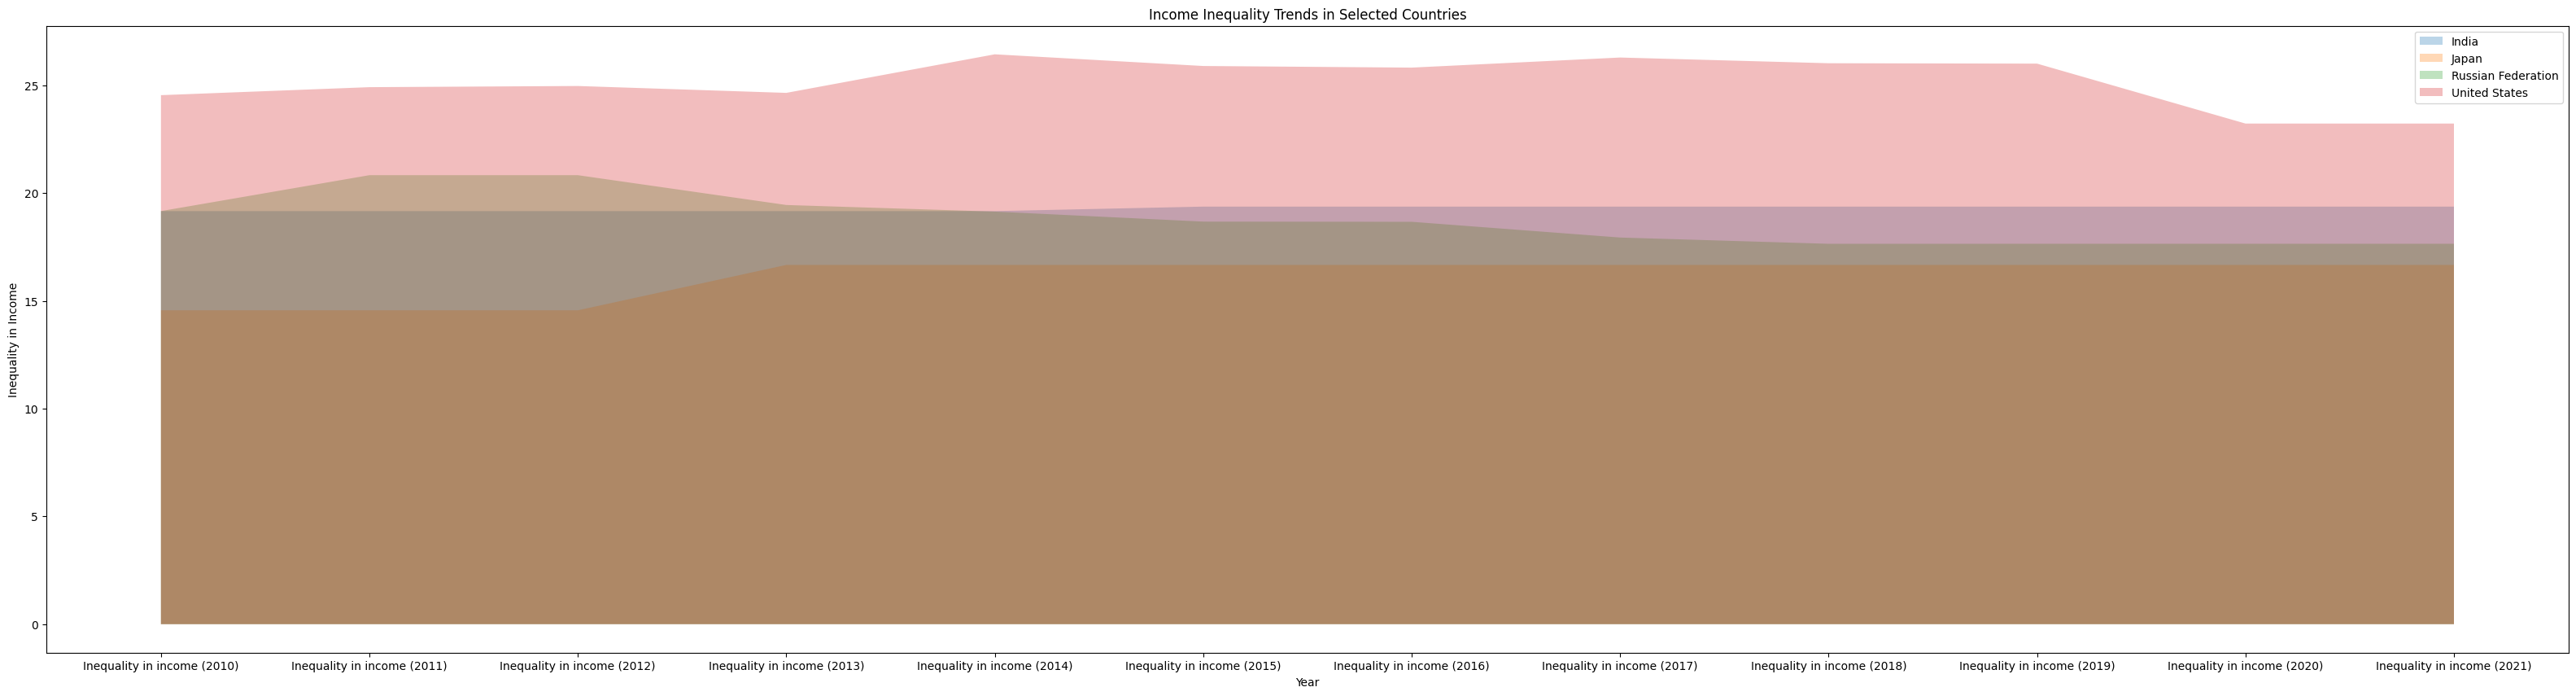

In [240]:
# 8. Area Chart

# Area Chart of Income Inequality Trends in Selected Countries 
selected_countries = data[data['Country'].isin(['United States', 'India', 'Russian Federation', 'Japan', 'United Kindom'])]
plt.figure(figsize=(40, 10))
for country in selected_countries['Country']:
    country_data = selected_countries[selected_countries['Country'] == country]
    plt.fill_between(years, country_data[years].values.flatten(), alpha=0.3, label=country)
plt.title('Income Inequality Trends in Selected Countries')
plt.xlabel('Year')
plt.ylabel('Inequality in Income')
plt.legend()
plt.show()


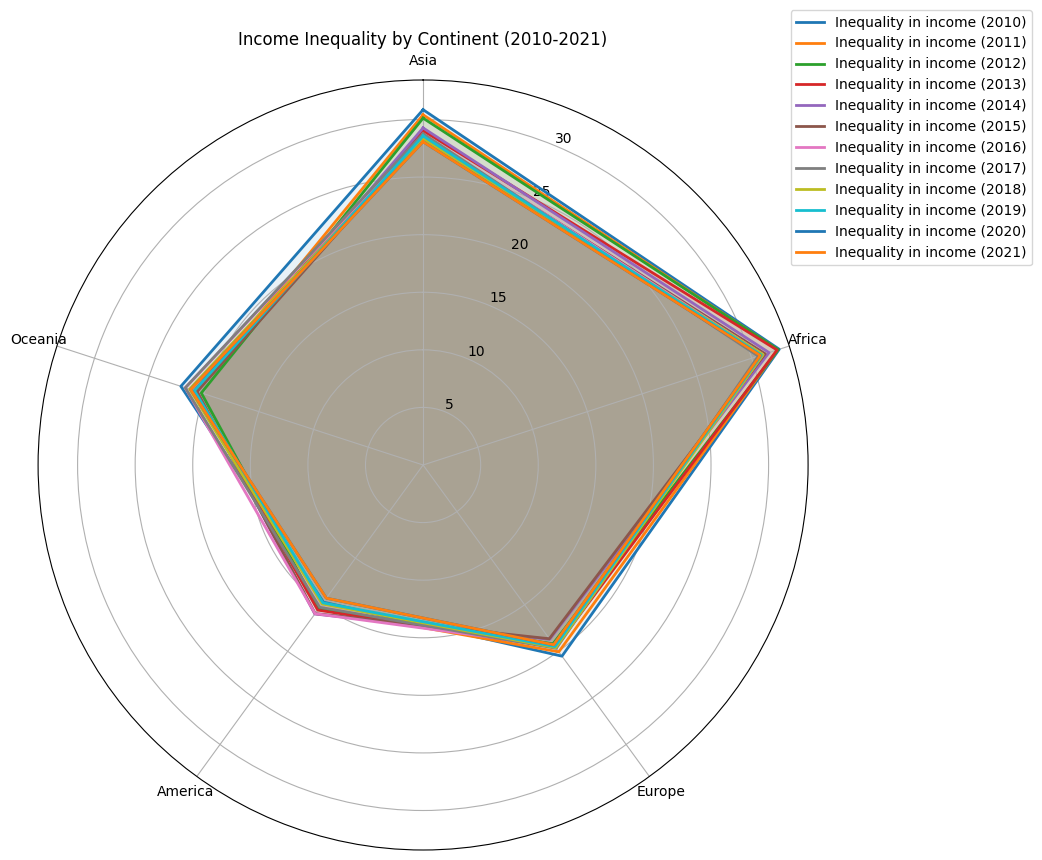

In [247]:
# 9. Radar Chart

# Radar Chart of Income Inequality Across Continents
years = [f'Inequality in income ({year})' for year in range(2010, 2022)]
continents = data['Continent'].unique()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Define angles for each continent
labels = data['Continent'].unique()
angles = [n / len(labels) * 2 * pi for n in range(len(labels))]
angles.append(angles[0])  

# Plot data for each year
for year in years:
    if year in data.columns: 
        values = data.groupby('Continent')[year].mean().fillna(0).tolist()  
        values.append(values[0]) 
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=year)
        ax.fill(angles, values, alpha=0.1)

# Adjust chart settings
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], labels)
plt.title('Income Inequality by Continent (2010-2021)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


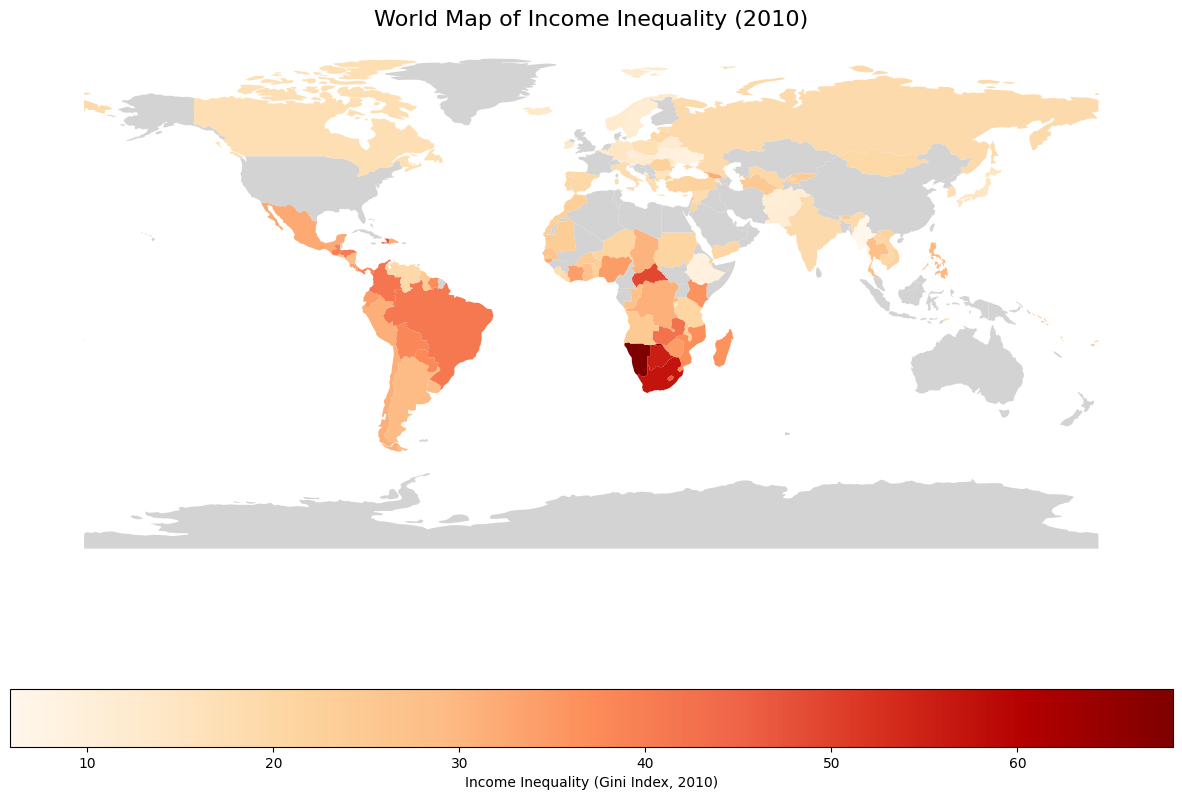

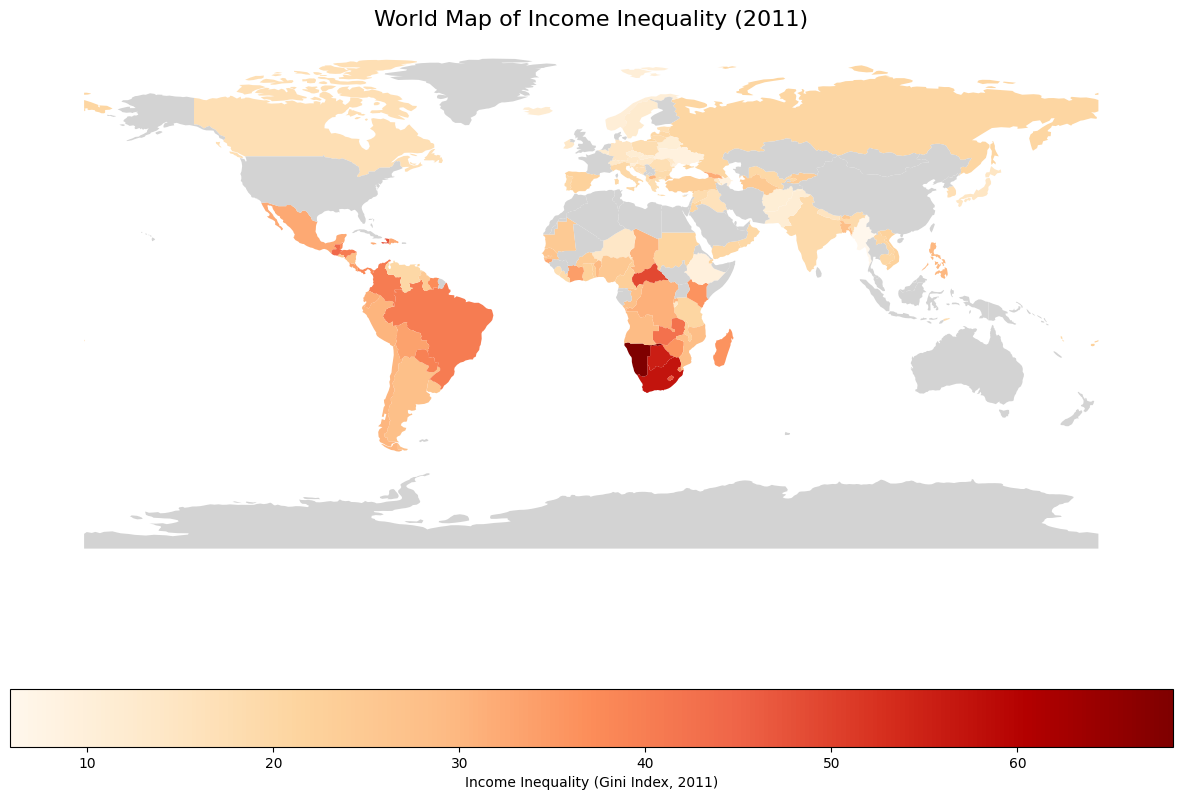

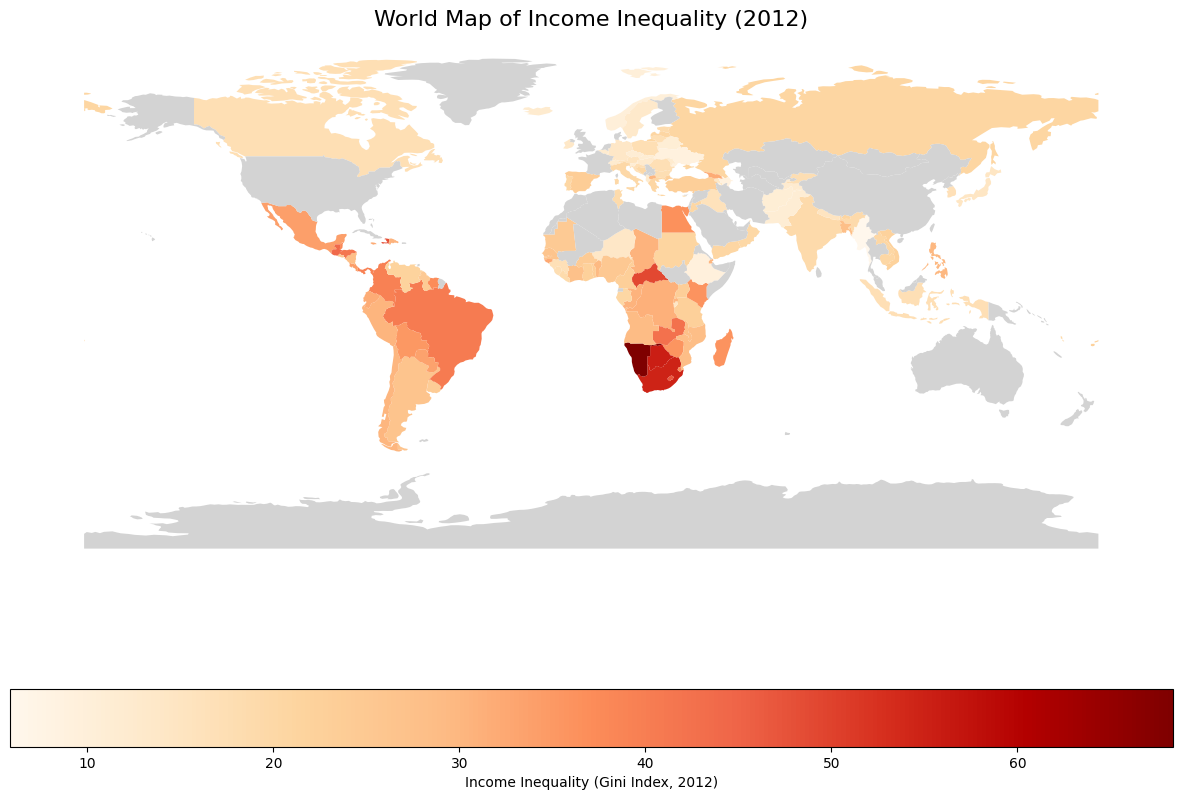

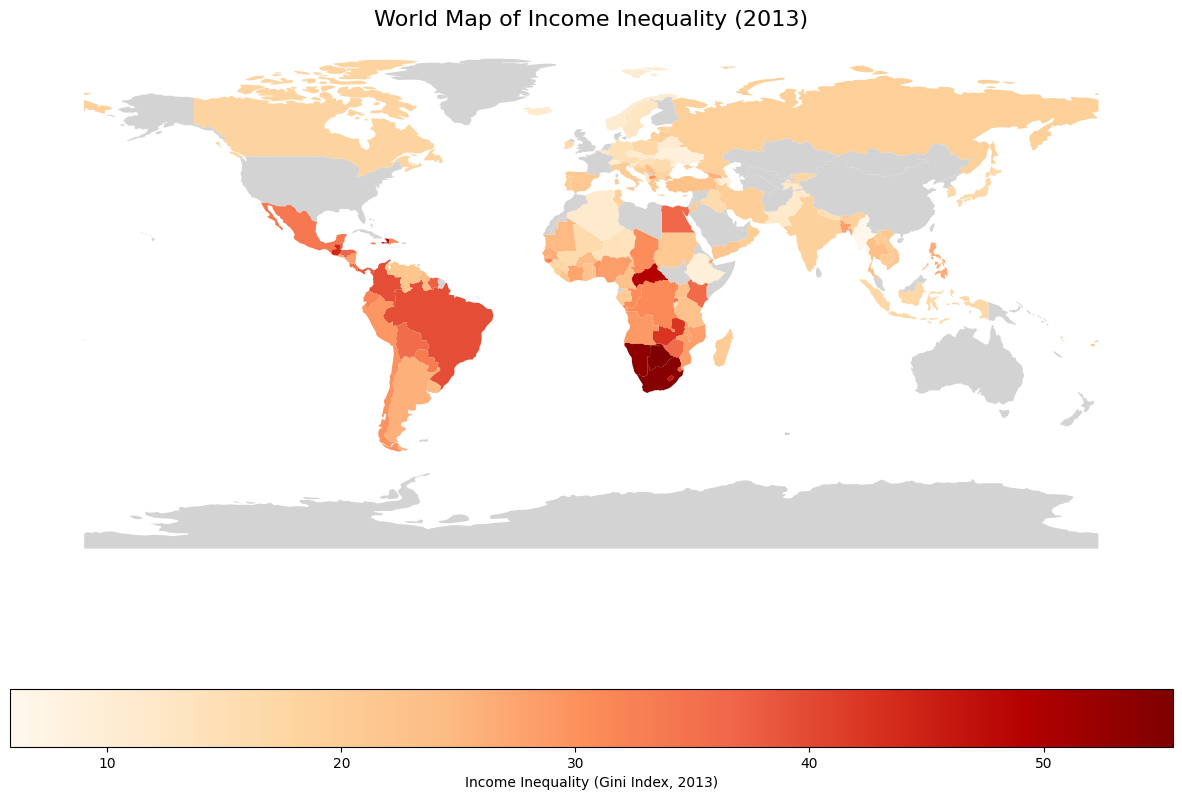

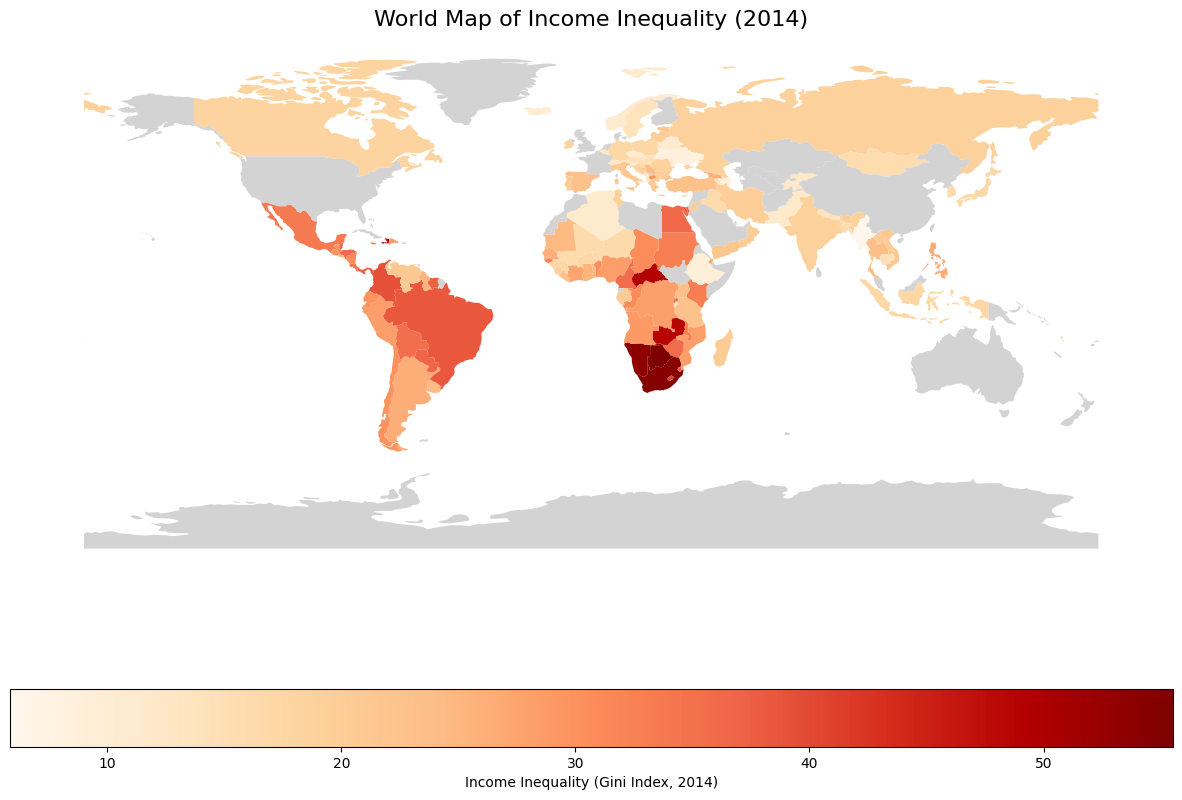

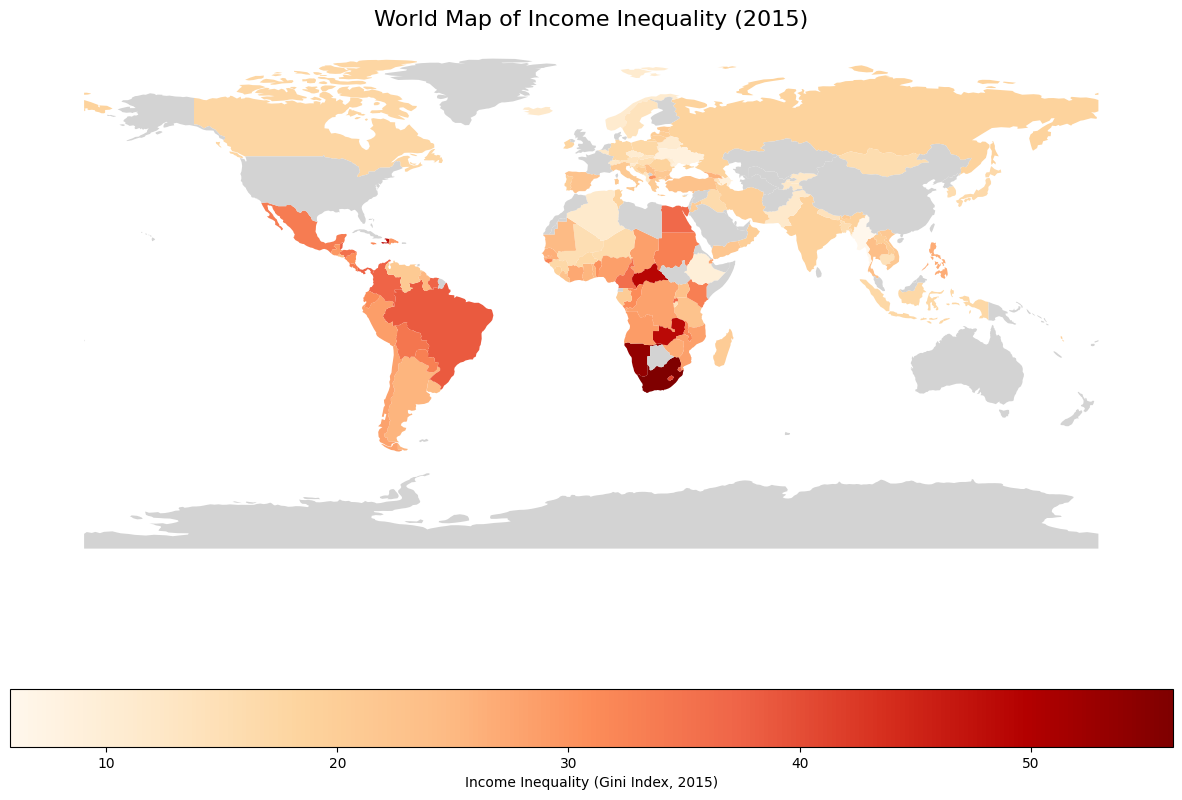

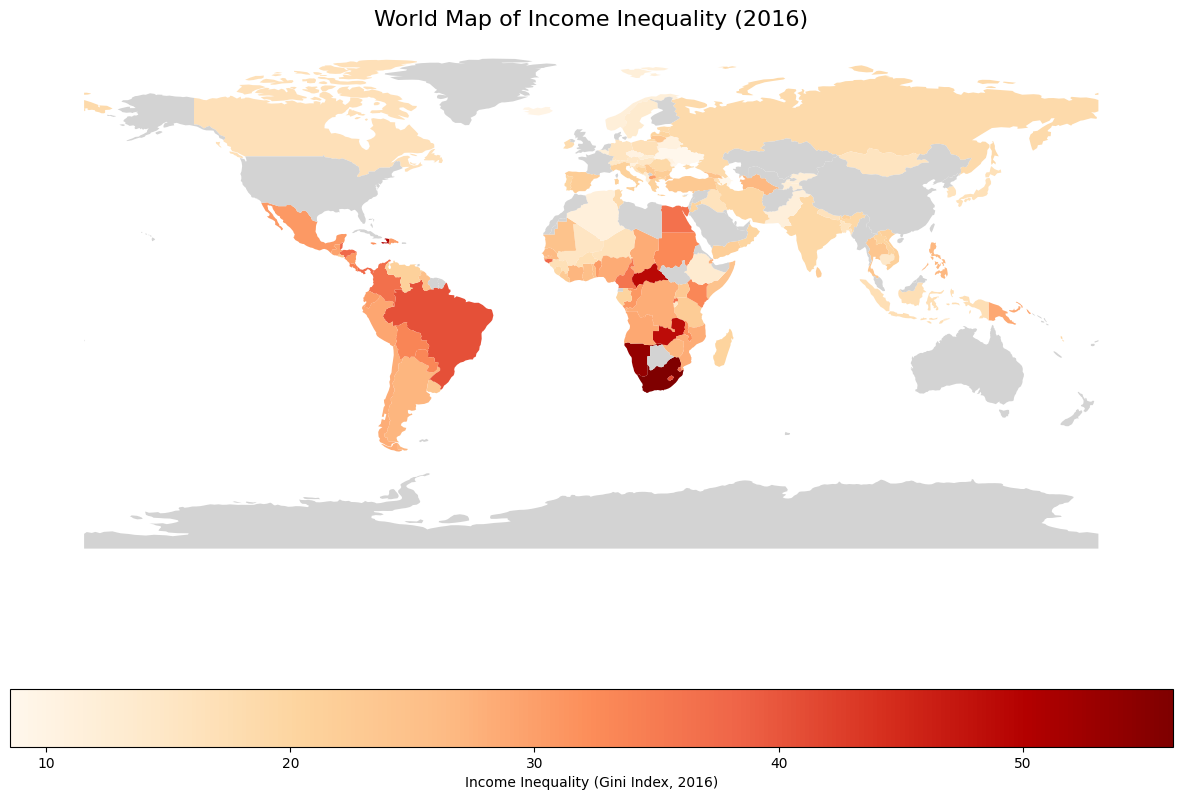

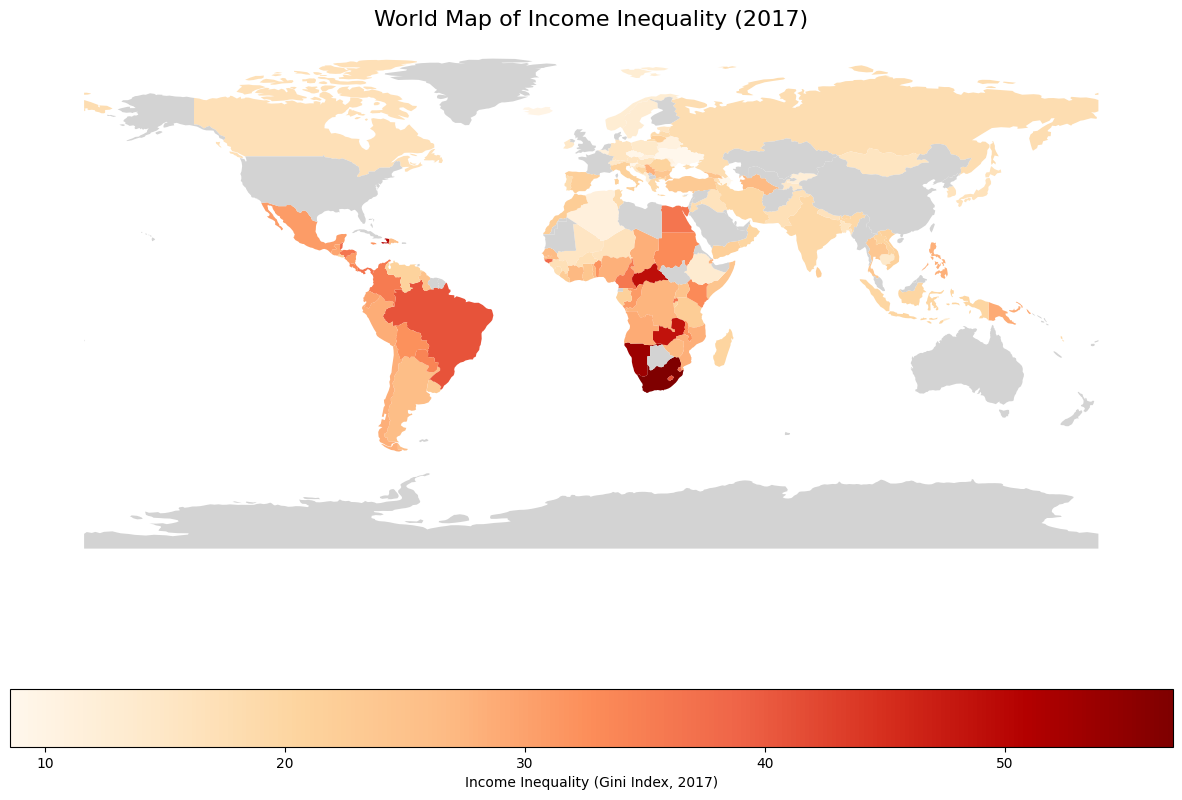

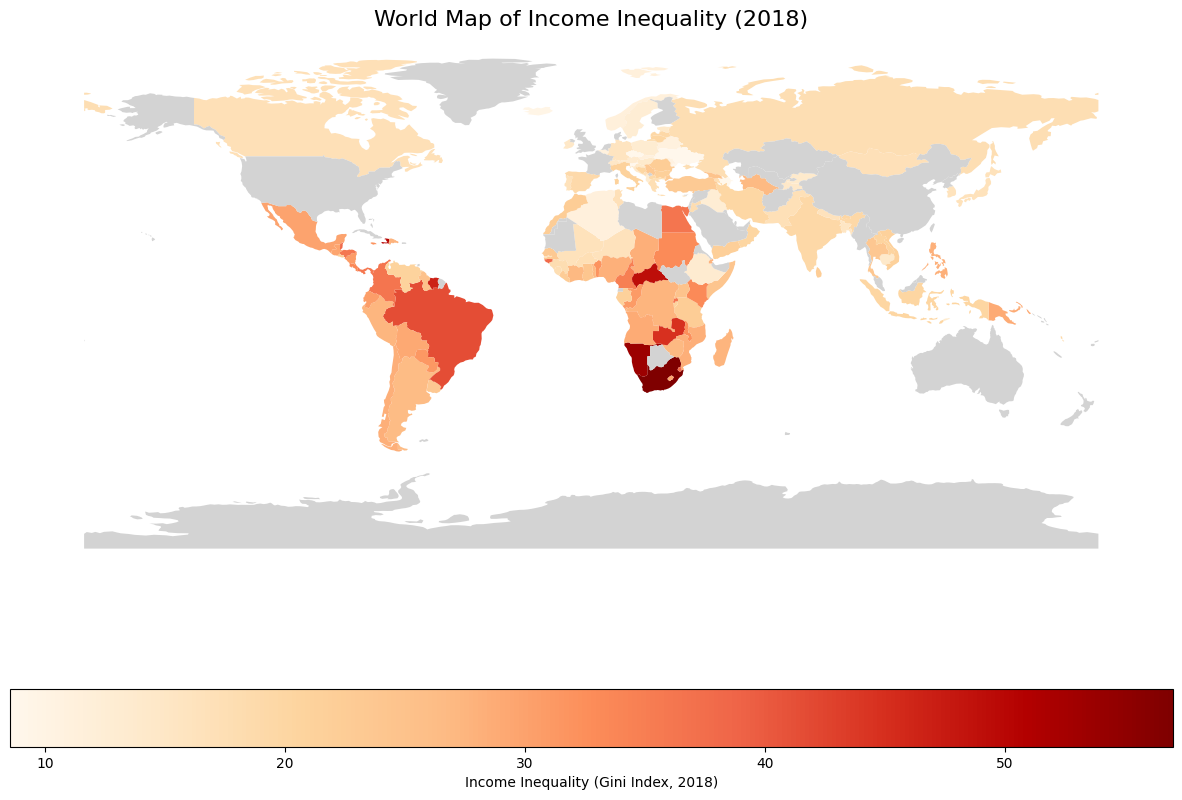

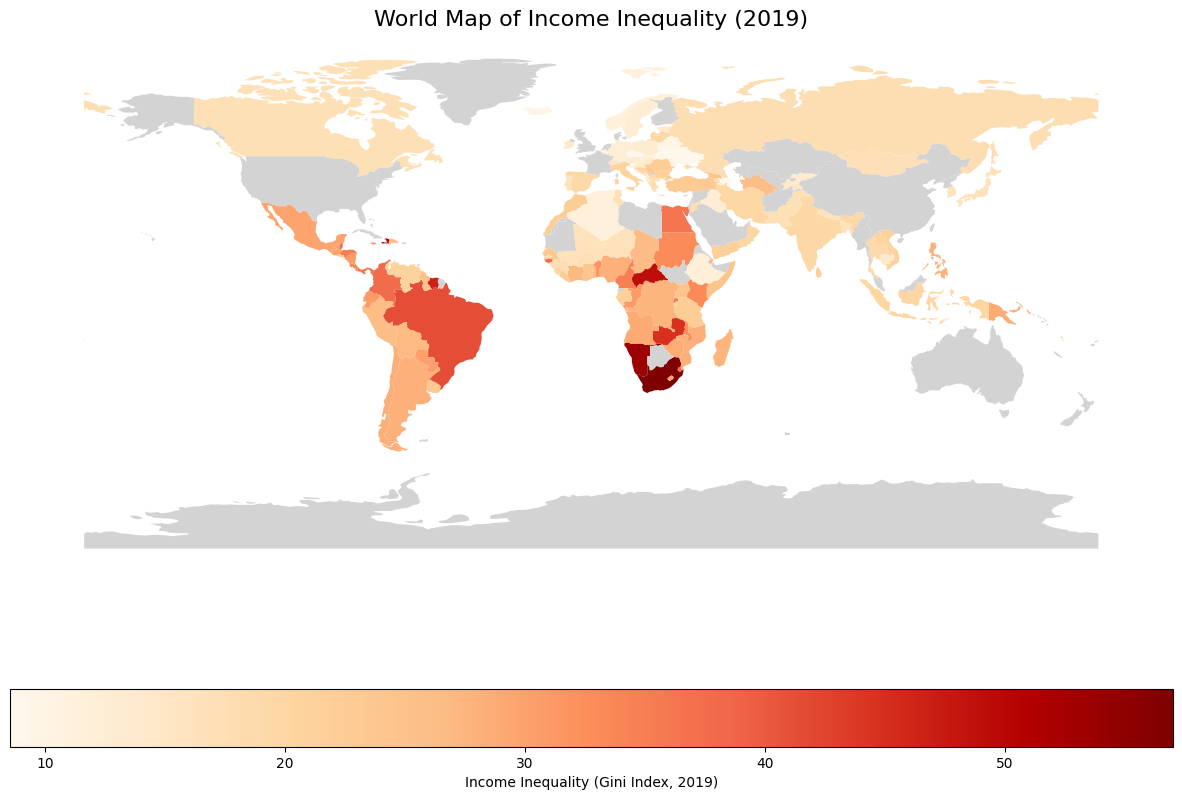

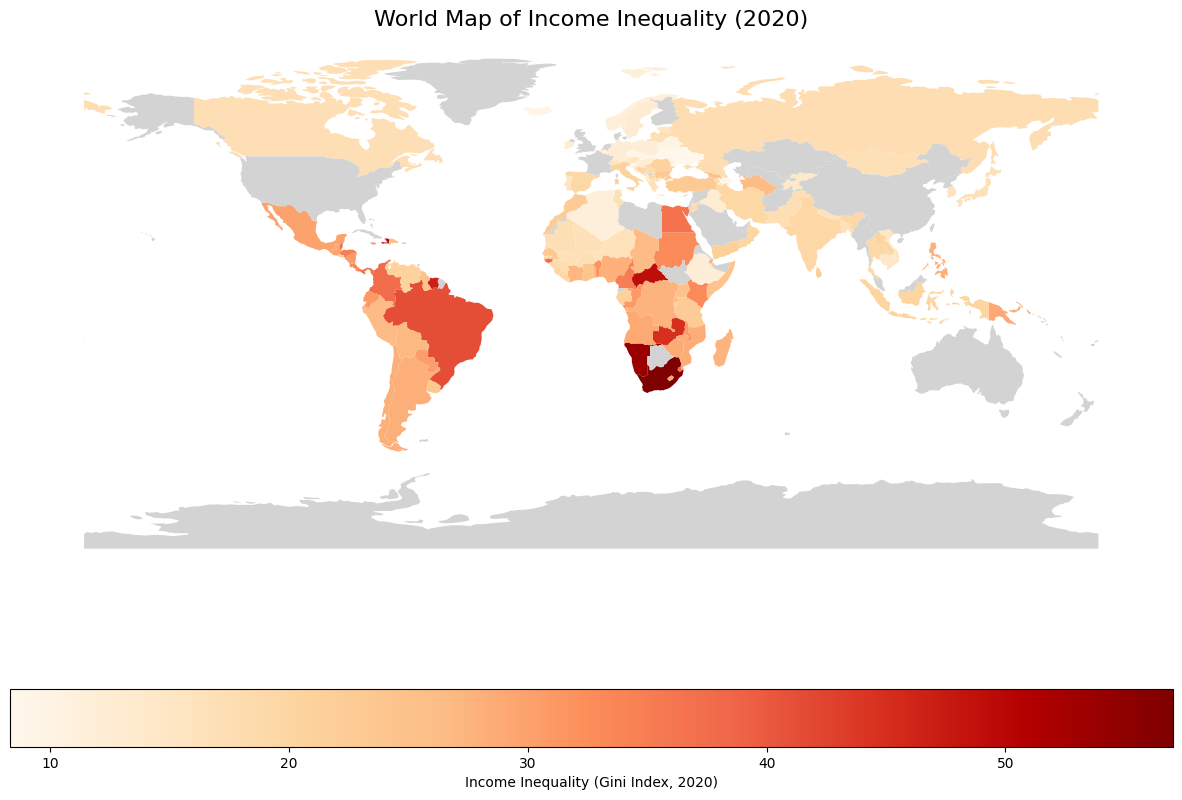

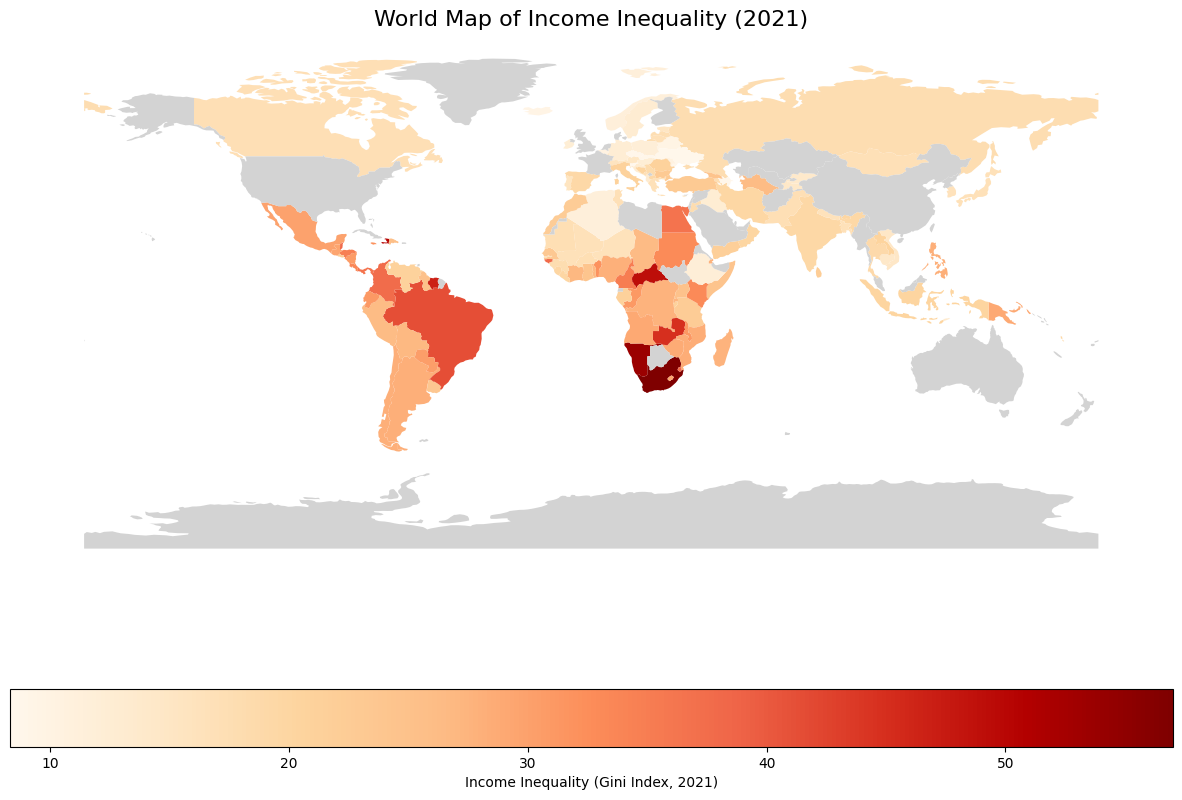

In [243]:
# 10. Geo Plot

# World Map showing Income Inequality from 2010 - 2022

# Load the world map dataset
world = gpd.read_file('110m Cultural Vectors/ne_110m_admin_0_countries.shp')

# Merge datasets using ISO3 codes
merged = world.merge(data, left_on='SOV_A3', right_on='ISO3', how='left')

# List of years to visualize
years = [str(year) for year in range(2010, 2022)]

# Create a world map for each year
for year in years:
    plt.figure(figsize=(15, 10))
    
    # Plot the world map with inequality data for the specific year
    merged.plot(column=f'Inequality in income ({year})', 
                cmap='OrRd', 
                ax=plt.gca(), 
                legend=True,
                legend_kwds={'label': f'Income Inequality (Gini Index, {year})',
                             'orientation': 'horizontal'},
                missing_kwds={'color': 'lightgrey'})
    
    # Title and labels
    plt.title(f'World Map of Income Inequality ({year})', fontsize=16)
    plt.axis('off')  
    plt.show()
